# numpy

Пакет `numpy` предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab` - львиная доля времени тратится в библиотечных функциях, написанных на `C`.

## Одномерные массивы

In [1]:
from numpy import (array,zeros,ones,arange,linspace,logspace,
                   float64,int64,sin,cos,pi,exp,log,sqrt,abs,
                   nan,inf,any,all,sort,hstack,vstack,hsplit,
                   delete,insert,append,eye,fromfunction,
                   trace,diag,average,std,outer,meshgrid)

Можно преобразовать список в массив.

In [2]:
a=array([0,2,1])
a,type(a)

(array([0, 2, 1]), numpy.ndarray)

`print` печатает массивы в удобной форме.

In [3]:
print(a)

[0 2 1]


Класс `ndarray` имеет много методов.

In [4]:
set(dir(a))-set(dir(object))

{'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delitem__',
 '__divmod__',
 '__float__',
 '__floordiv__',
 '__getitem__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__len__',
 '__lshift__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__neg__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setitem__',
 '__setstate__',
 '__sub__',
 '__truediv__',
 '__xor__',
 'all',
 'any',

Наш массив одномерный.

In [5]:
a.ndim

1

В $n$-мерном случае возвращается кортеж размеров по каждой координате.

In [6]:
a.shape

(3,)

`size` - это полное число элементов в массиве; `len` - размер по первой координате (в 1-мерном случае это то же самое).

In [7]:
len(a),a.size

(3, 3)

`numpy` предоставляет несколько типов для целых (`int16`, `int32`, `int64`) и чисел с плавающей точкой (`float32`, `float64`).

In [8]:
a.dtype,a.dtype.name,a.itemsize

(dtype('int64'), 'int64', 8)

Индексировать массив можно обычным образом.

In [9]:
a[1]

2

Массивы - изменяемые объекты.

In [10]:
a[1]=3
print(a)

[0 3 1]


Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` - быстродействие. Всегда, когда это возможно, лучше использовать операции над массивами как едиными целыми.

In [11]:
for i in a:
    print(i)

0
3
1


Массив чисел с плавающей точкой.

In [12]:
b=array([0.,2,1])
b.dtype

dtype('float64')

Точно такой же массив.

In [13]:
c=array([0,2,1],dtype=float64)
print(c)

[ 0.  2.  1.]


In [ ]:
array([1.2,1.5,1.8],dtype=int64)

Массив, значения которого вычисляются функцией. Функции передаётся массив. Так что в ней можно использовать только такие операции, которые применимы к массивам.

In [14]:
def f(i):
    print(i)
    return i**2
a=fromfunction(f,(5,),dtype=int64)
print(a)

[0 1 2 3 4]
[ 0  1  4  9 16]


In [15]:
a=fromfunction(f,(5,),dtype=float64)
print(a)

[ 0.  1.  2.  3.  4.]
[  0.   1.   4.   9.  16.]


Массивы, заполненные нулями или единицами. Часто лучше сначала создать такой массив, а потом присваивать значения его элементам.

In [16]:
a=zeros(3)
print(a)

[ 0.  0.  0.]


In [17]:
b=ones(3,dtype=int64)
print(b)

[1 1 1]


Функция `arange` подобна `range`. Аргументы могут быть с плавающей точкой. Следует избегать ситуаций, когда $(конец-начало)/шаг$ - целое число, потому что в этом случае включение последнего элемента зависит от ошибок округления. Лучше, чтобы конец диапазона был где-то посредине шага.

In [18]:
a=arange(0,9,2)
print(a)

[0 2 4 6 8]


In [19]:
b=arange(0.,9,2)
print(b)

[ 0.  2.  4.  6.  8.]


Последовательности чисел с постоянным шагом можно также создавать функцией `linspace`. Начало и конец диапазона включаются; последний аргумент - число точек.

In [20]:
a=linspace(0,8,5)
print(a)

[ 0.  2.  4.  6.  8.]


Последовательность чисел с постоянным шагом по логарифмической шкале от $10^0$ до $10^1$.

In [21]:
b=logspace(0,1,5)
print(b)

[  1.           1.77827941   3.16227766   5.62341325  10.        ]


Массив случайных чисел.

In [22]:
from numpy.random import random,normal
print(random(5))

[ 0.63038745  0.24031792  0.75969506  0.98191274  0.9023238 ]


Случайные числа с нормальным (гауссовым) распределением (среднее `0`, среднеквадратичное отклонение `1`).

In [24]:
print(normal(size=5))

[-0.06409544  0.26656068 -1.83718422 -1.01312915  0.0445343 ]


## Операции над одномерными массивами

Арифметические операции проводятся поэлементно.

In [25]:
print(a+b)

[  1.           3.77827941   7.16227766  11.62341325  18.        ]


In [26]:
print(a-b)

[-1.          0.22172059  0.83772234  0.37658675 -2.        ]


In [27]:
print(a*b)

[  0.           3.55655882  12.64911064  33.74047951  80.        ]


Скалярное произведение

In [28]:
a@b

129.9461489721723

In [29]:
print(a/b)

[ 0.          1.12468265  1.26491106  1.06696765  0.8       ]


In [30]:
print(a**2)

[  0.   4.  16.  36.  64.]


Когда операнды разных типов, они пиводятся к большему типу.

In [31]:
i=ones(5,dtype=int64)
print(a+i)

[ 1.  3.  5.  7.  9.]


`numpy` содержит элементарные функции, которые тоже применяются к массивам поэлементно. Они называются универсальными функциями (`ufunc`).

In [32]:
sin,type(sin)

(<ufunc 'sin'>, numpy.ufunc)

In [33]:
print(sin(a))

[ 0.          0.90929743 -0.7568025  -0.2794155   0.98935825]


Один из операндов может быть скаляром, а не массивом.

In [34]:
print(a+1)

[ 1.  3.  5.  7.  9.]


In [35]:
print(2*a)

[  0.   4.   8.  12.  16.]


Сравнения дают булевы массивы.

In [36]:
print(a>b)

[False  True  True  True False]


In [37]:
print(a==b)

[False False False False False]


In [38]:
c=a>5
print(c)

[False False False  True  True]


Кванторы "существует" и "для всех".

In [39]:
any(c),all(c)

(True, False)

Модификация на месте.

In [40]:
a+=1
print(a)

[ 1.  3.  5.  7.  9.]


In [41]:
b*=2
print(b)

[  2.           3.55655882   6.32455532  11.2468265   20.        ]


In [42]:
b/=a
print(b)

[ 2.          1.18551961  1.26491106  1.6066895   2.22222222]


Так делать можно.

In [43]:
a+=i

А так нельзя.

In [44]:
i+=a

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

При выполнении операций над массивами деление на 0 не возбуждает исключения, а даёт значения `np.nan` или `np.inf`.

In [45]:
print(array([0.0,0.0,1.0,-1.0])/array([1.0,0.0,0.0,0.0]))

[  0.  nan  inf -inf]


/usr/lib64/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/lib64/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [46]:
nan+1,inf+1,inf*0,1./inf,inf/inf

(nan, inf, nan, 0.0, nan)

In [47]:
nan==nan,inf==inf

(False, True)

Сумма и произведение всех элементов массива; максимальный и минимальный элемент; среднее и среднеквадратичное отклонение.

In [48]:
b.sum(),b.prod(),b.max(),b.min(),b.mean(),b.std()

(8.2793423935260435,
 10.708241812210389,
 2.2222222222222223,
 1.1855196066926152,
 1.6558684787052087,
 0.40390033426607452)

In [49]:
x=normal(size=1000)
x.mean(),x.std()

(-0.048736395274562645, 0.98622825985036244)

Функция `sort` возвращает отсортированную копию, метод `sort` сортирует на месте.

In [50]:
print(sort(b))
print(b)

[ 1.18551961  1.26491106  1.6066895   2.          2.22222222]
[ 2.          1.18551961  1.26491106  1.6066895   2.22222222]


In [51]:
b.sort()
print(b)

[ 1.18551961  1.26491106  1.6066895   2.          2.22222222]


Объединение массивов.

In [52]:
a=hstack((a,b))
print(a)

[  2.           4.           6.           8.          10.           1.18551961
   1.26491106   1.6066895    2.           2.22222222]


Расщепление массива в позициях 3 и 6.

In [53]:
hsplit(a,[3,6])

[array([ 2.,  4.,  6.]),
 array([  8.        ,  10.        ,   1.18551961]),
 array([ 1.26491106,  1.6066895 ,  2.        ,  2.22222222])]

Функции `delete`, `insert` и `append` не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены в середину или добавлены в конец какие-то элементы.

In [54]:
a=delete(a,[5,7])
print(a)

[  2.           4.           6.           8.          10.           1.26491106
   2.           2.22222222]


In [55]:
a=insert(a,2,[0,0])
print(a)

[  2.           4.           0.           0.           6.           8.          10.
   1.26491106   2.           2.22222222]


In [56]:
a=append(a,[1,2,3])
print(a)

[  2.           4.           0.           0.           6.           8.          10.
   1.26491106   2.           2.22222222   1.           2.           3.        ]


Есть несколько способов индексации массива. Вот обычный индекс.

In [57]:
a=linspace(0,1,11)
print(a)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [58]:
b=a[2]
print(b)

0.2


Диапазон индексов. Создаётся новый заголовок массива, указывающий на те же данные. Изменения, сделанные через такой массив, видны и в исходном массиве.

In [59]:
b=a[2:6]
print(b)

[ 0.2  0.3  0.4  0.5]


In [60]:
b[0]=-0.2
print(b)

[-0.2  0.3  0.4  0.5]


In [61]:
print(a)

[ 0.   0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Диапазон с шагом 2.

In [62]:
b=a[1:10:2]
print(b)

[ 0.1  0.3  0.5  0.7  0.9]


In [63]:
b[0]=-0.1
print(a)

[ 0.  -0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Массив в обратном порядке.

In [64]:
b=a[len(a):0:-1]
print(b)

[ 1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3 -0.2 -0.1]


Подмассиву можно присвоить значение - массив правильного размера или скаляр.

In [65]:
a[1:10:3]=0
print(a)

[ 0.   0.  -0.2  0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]


Тут опять создаётся только новый заголовок, указывающий на те же данные.

In [66]:
b=a[:]
b[1]=0.1
print(a)

[ 0.   0.1 -0.2  0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]


Чтобы скопировать и данные массива, нужно использовать метод `copy`.

In [67]:
b=a.copy()
b[2]=0
print(b)
print(a)

[ 0.   0.1  0.   0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]
[ 0.   0.1 -0.2  0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]


Можно задать список индексов.

In [68]:
print(a[[2,3,5]])

[-0.2  0.3  0.5]


In [69]:
print(a[array([2,3,5])])

[-0.2  0.3  0.5]


Можно задать булев массив той же величины.

In [70]:
b=a>0
print(b)

[False  True False  True False  True  True False  True  True  True]


In [71]:
print(a[b])

[ 0.1  0.3  0.5  0.6  0.8  0.9  1. ]


## 2-мерные массивы

In [72]:
a=array([[0.0,1.0],[-1.0,0.0]])
print(a)

[[ 0.  1.]
 [-1.  0.]]


In [73]:
a.ndim

2

In [74]:
a.shape

(2, 2)

In [75]:
len(a),a.size

(2, 4)

In [76]:
a[1,0]

-1.0

Атрибуту `shape` можно присвоить новое значение - кортеж размеров по всем координатам. Получится новый заголовок массива; его данные не изменятся.

In [77]:
b=linspace(0,3,4)
print(b)

[ 0.  1.  2.  3.]


In [78]:
b.shape

(4,)

In [79]:
b.shape=2,2
print(b)

[[ 0.  1.]
 [ 2.  3.]]


Поэлементное и матричное умножение.

In [80]:
print(a*b)

[[ 0.  1.]
 [-2.  0.]]


In [81]:
print(a@b)

[[ 2.  3.]
 [ 0. -1.]]


In [82]:
print(b@a)

[[-1.  0.]
 [-3.  2.]]


Умножение матрицы на вектор.

In [83]:
v=array([1,-1],dtype=float64)
print(b@v)

[-1. -1.]


In [84]:
print(v@b)

[-2. -2.]


Внешнее произведение $a_{ij}=u_i v_j$

In [85]:
u=linspace(1,2,2)
v=linspace(2,4,3)
print(u)
print(v)

[ 1.  2.]
[ 2.  3.  4.]


In [86]:
a=outer(u,v)
print(a)

[[ 2.  3.  4.]
 [ 4.  6.  8.]]


Двумерные массивы, зависящие только от одного индекса: $x_{ij}=u_j$, $y_{ij}=v_i$

In [87]:
x,y=meshgrid(u,v)
print(x)
print(y)

[[ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]]
[[ 2.  2.]
 [ 3.  3.]
 [ 4.  4.]]


Единичная матрица.

In [88]:
I=eye(4)
print(I)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


Метод `reshape` делает то же самое, что присваивание атрибуту `shape`.

In [89]:
print(I.reshape(16))

[ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]


In [90]:
print(I.reshape(2,8))

[[ 1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1.]]


Строка.

In [91]:
print(I[1])

[ 0.  1.  0.  0.]


Цикл по строкам.

In [92]:
for row in I:
    print(row)

[ 1.  0.  0.  0.]
[ 0.  1.  0.  0.]
[ 0.  0.  1.  0.]
[ 0.  0.  0.  1.]


Столбец.

In [93]:
print(I[:,2])

[ 0.  0.  1.  0.]


Подматрица.

In [94]:
print(I[0:2,1:3])

[[ 0.  0.]
 [ 1.  0.]]


Можно построить двумерный массив из функции.

In [95]:
def f(i,j):
    print(i)
    print(j)
    return 10*i+j
print(fromfunction(f,(4,4),dtype=int64))

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]]


Транспонированная матрица.

In [96]:
print(b.T)

[[ 0.  2.]
 [ 1.  3.]]


Соединение матриц по горизонтали и по вертикали.

In [97]:
a=array([[0,1],[2,3]])
b=array([[4,5,6],[7,8,9]])
c=array([[4,5],[6,7],[8,9]])
print(a)
print(b)
print(c)

[[0 1]
 [2 3]]
[[4 5 6]
 [7 8 9]]
[[4 5]
 [6 7]
 [8 9]]


In [98]:
print(hstack((a,b)))

[[0 1 4 5 6]
 [2 3 7 8 9]]


In [99]:
print(vstack((a,c)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


Сумма всех элементов; суммы столбцов; суммы строк.

In [100]:
print(b.sum())
print(b.sum(0))
print(b.sum(1))

39
[11 13 15]
[15 24]


Аналогично работают `prod`, `max`, `min` и т.д.

In [101]:
print(b.max(0))
print(b.min(1))

[7 8 9]
[4 7]


След - сумма диагональных элементов.

In [102]:
trace(a)

3

## Линейная алгебра

In [103]:
from numpy.linalg import det,inv,solve,eig
det(a)

-2.0

Обратная матрица.

In [104]:
a1=inv(a)
print(a1)

[[-1.5  0.5]
 [ 1.   0. ]]


In [105]:
print(a@a1)
print(a1@a)

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


Решение линейной системы $au=v$.

In [106]:
v=array([0,1],dtype=float64)
print(a1@v)

[ 0.5  0. ]


In [107]:
u=solve(a,v)
print(u)

[ 0.5  0. ]


Проверим.

In [108]:
print(a@u-v)

[ 0.  0.]


Собственные значения и собственные векторы: $a u_i = \lambda_i u_i$. `l` - одномерный массив собственных значений $\lambda_i$, столбцы матрицы $u$ - собственные векторы $u_i$.

In [109]:
l,u=eig(a)
print(l)

[-0.56155281  3.56155281]


In [110]:
print(u)

[[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]


Проверим.

In [111]:
for i in range(2):
    print(a@u[:,i]-l[i]*u[:,i])

[  0.00000000e+00   1.66533454e-16]
[  1.11022302e-16   0.00000000e+00]


Функция `diag` от одномерного массива строит диагональную матрицу; от квадратной матрицы - возвращает одномерный массив её диагональных элементов.

In [112]:
L=diag(l)
print(L)
print(diag(L))

[[-0.56155281  0.        ]
 [ 0.          3.56155281]]
[-0.56155281  3.56155281]


Все уравнения $a u_i = \lambda_i u_i$ можно собрать в одно матричное уравнение $a u = u \Lambda$, где $\Lambda$ - диагональная матрица с собственными значениями $\lambda_i$ по диагонали.

In [113]:
print(a@u-u@L)

[[  0.00000000e+00   1.11022302e-16]
 [  1.66533454e-16   0.00000000e+00]]


Поэтому $u^{-1} a u = \Lambda$.

In [114]:
print(inv(u)@a@u)

[[ -5.61552813e-01   0.00000000e+00]
 [ -2.22044605e-16   3.56155281e+00]]


Найдём теперь левые собственные векторы $v_i a = \lambda_i v_i$ (собственные значения $\lambda_i$ те же самые).

In [115]:
l,v=eig(a.T)
print(l)
print(v)

[-0.56155281  3.56155281]
[[-0.96276969 -0.48963374]
 [ 0.27032301 -0.87192821]]


Собственные векторы нормированы на 1.

In [116]:
print(u.T@u)
print(v.T@v)

[[ 1.         -0.23570226]
 [-0.23570226  1.        ]]
[[ 1.          0.23570226]
 [ 0.23570226  1.        ]]


Левые и правые собственные векторы, соответствующие разным собственным значениям, ортогональны, потому что $v_i a u_j = \lambda_i v_i u_j = \lambda_j v_i u_j$.

In [117]:
print(v.T@u)

[[  9.71825316e-01   0.00000000e+00]
 [ -5.55111512e-17   9.71825316e-01]]


## Преобразование Фурье

In [118]:
a=linspace(0,1,11)
print(a)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [119]:
from numpy.fft import fft,ifft
b=fft(a)
print(b)

[ 5.50+0.j         -0.55+1.87312798j -0.55+0.85581671j -0.55+0.47657771j
 -0.55+0.25117658j -0.55+0.07907806j -0.55-0.07907806j -0.55-0.25117658j
 -0.55-0.47657771j -0.55-0.85581671j -0.55-1.87312798j]


Обратное преобразование Фурье.

In [120]:
print(ifft(b))

[  1.61486985e-15+0.j   1.00000000e-01+0.j   2.00000000e-01+0.j
   3.00000000e-01+0.j   4.00000000e-01+0.j   5.00000000e-01+0.j
   6.00000000e-01+0.j   7.00000000e-01+0.j   8.00000000e-01+0.j
   9.00000000e-01+0.j   1.00000000e+00+0.j]


## Интегрирование

In [121]:
from scipy.integrate import quad,odeint
from scipy.special import erf

In [122]:
def f(x):
    return exp(-x**2)

Адаптивное численное интегрирование (может быть до бесконечности). `err` - оценка ошибки.

In [123]:
res,err=quad(f,0,inf)
print(sqrt(pi)/2,res,err)

0.886226925453 0.8862269254527579 7.101318390472462e-09


In [124]:
res,err=quad(f,0,1)
print(sqrt(pi)/2*erf(1),res,err)

0.746824132812 0.7468241328124271 8.291413475940725e-15


## Дифференциальные уравнения

Уравнение осциллятора с затуханием $\ddot{x} + 2 a \dot{x} + x = 0$. Перепишем его в виде системы уравнений первого порядка для $x$, $v=\dot{x}$:

$\frac{d}{dt} \begin{pmatrix}x\\v\end{pmatrix} = \begin{pmatrix}v\\-2av-x\end{pmatrix}$

Решим эту систему численно при $a=0.2$ с начальным условием
$\begin{pmatrix}x\\v\end{pmatrix}=\begin{pmatrix}1\\0\end{pmatrix}$

In [125]:
a=0.2
def f(x,t):
    global a
    return [x[1],-x[0]-2*a*x[1]]

In [126]:
t=linspace(0,10,1000)
x=odeint(f,[1,0],t)

Графики координаты и скорости.

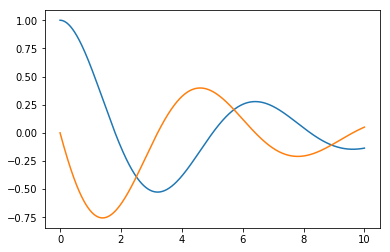

In [127]:
from matplotlib.pyplot import plot
%matplotlib inline
plot(t,x)

Точное решение для координаты.

In [128]:
b=sqrt(1-a**2)
x0=exp(-a*t)*(cos(b*t)+a/b*sin(b*t))

Максимальное отличие численного решения от точного.

In [129]:
abs(x[:,0]-x0).max()

7.4104573116740013e-08